In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris 
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score 


In [2]:
dataset = load_iris() 
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df['Class'] = dataset.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Text(0, 0.5, 'WCSS')

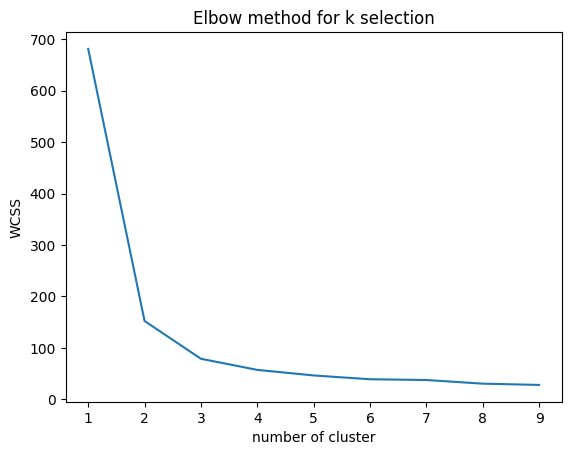

In [5]:
wcss = [] 
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('Elbow method for k selection')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')

In [7]:
#taking silhouette score coeffecient 
from sklearn.metrics import silhouette_score
for n_cluster in range(2,10):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_ 
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print('for n clusters ={}, the silhouette score is {}'.format(n_cluster, sil_coeff))

for n clusters =2, the silhouette score is 0.6810461692117462
for n clusters =3, the silhouette score is 0.5511916046195919
for n clusters =4, the silhouette score is 0.49535632852884987
for n clusters =5, the silhouette score is 0.49308040671935205
for n clusters =6, the silhouette score is 0.42744575643643373
for n clusters =7, the silhouette score is 0.3211869554344267
for n clusters =8, the silhouette score is 0.34065171021762863
for n clusters =9, the silhouette score is 0.3354972812466381


In [8]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df1 = df.drop_duplicates().reset_index(drop=True)
df = df1
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.shape

(200, 5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18640\3928305129.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 15)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18640\3928305129.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 15)
C:\Users\Dell\AppData\Local\Temp\ipy

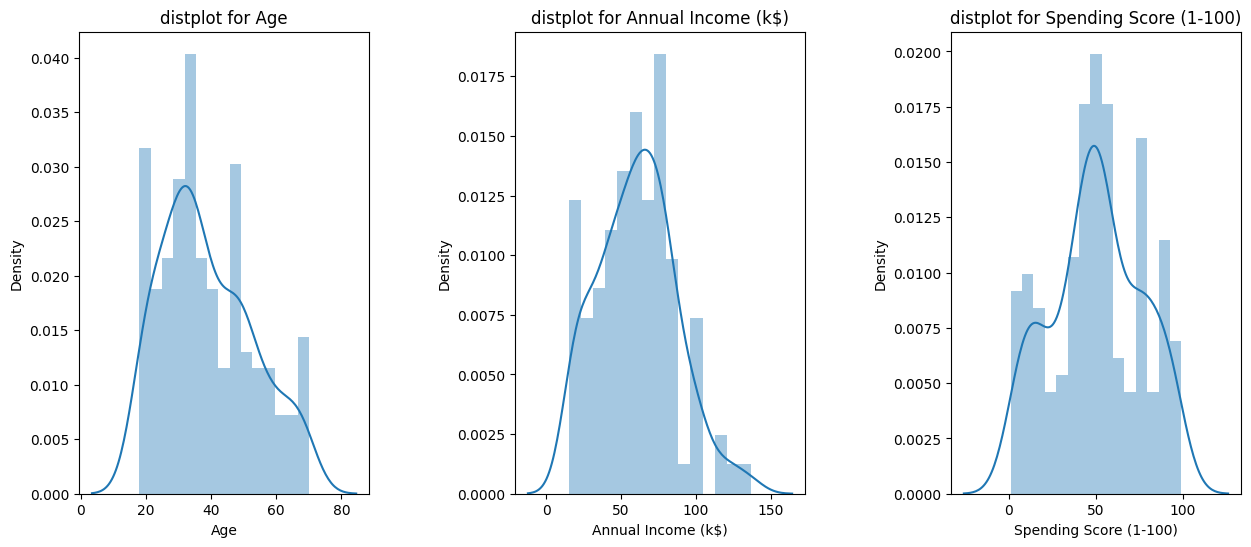

In [13]:
#plotting the values to check for their distribution
plt.figure(figsize=(15,6))
n = 0
for x in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 15)
    plt.title('distplot for {}'.format(x))
plt.show()

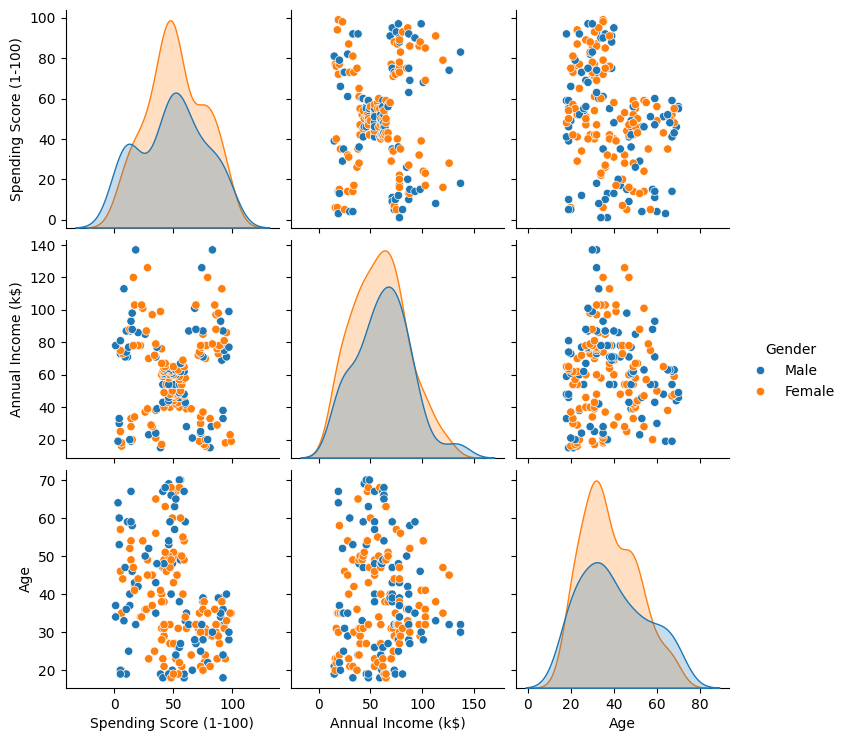

In [14]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

Text(0, 0.5, 'wcss')

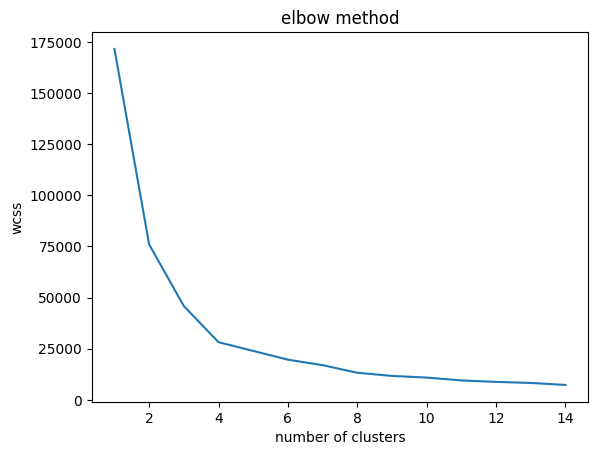

In [16]:
#deciding the k value
#elbow method
X = df[['Age','Spending Score (1-100)']]
y = df[['Annual Income (k$)']]
encoder = LabelEncoder()

wcss=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters, wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')


In [18]:
#silhouette coeffecient method
for n_cluster in range(2,15):
    kmeans = KMeans(n_clusters = n_cluster).fit(X)
    label = kmeans.labels_ 
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print('for n clusters ={}, the silhouette score is {}'.format(n_cluster, sil_coeff))


for n clusters =2, the silhouette score is 0.4692341232501655
for n clusters =3, the silhouette score is 0.45300127016521263
for n clusters =4, the silhouette score is 0.4994683048348817
for n clusters =5, the silhouette score is 0.46801203307643385
for n clusters =6, the silhouette score is 0.4282564003324285
for n clusters =7, the silhouette score is 0.42313509747504796
for n clusters =8, the silhouette score is 0.39756261918529157
for n clusters =9, the silhouette score is 0.4180068868438424
for n clusters =10, the silhouette score is 0.40516467525480365
for n clusters =11, the silhouette score is 0.4032334751325074
for n clusters =12, the silhouette score is 0.3909422436467727
for n clusters =13, the silhouette score is 0.4064681499522757
for n clusters =14, the silhouette score is 0.40966124222618694


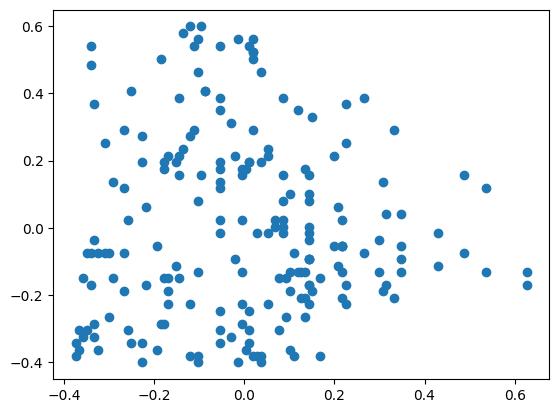

In [24]:
import pylab as pl 
from sklearn.decomposition import PCA 
X = df[['Age']]
y = df[['Annual Income (k$)']]
xnorm = (X-X.mean())/(X.max()-X.min())
ynorm = (y-y.mean())/(y.max()-y.min())
plt.scatter(ynorm, xnorm)



In [39]:
Nc = range(1,15)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14)]

In [41]:
score = [kmeans[i].fit(ynorm).score(ynorm) for i in range(len(kmeans))]
score

[-9.223144316044078,
 -3.269342172056497,
 -1.5807680847831933,
 -0.9301412320759677,
 -0.5733952670352762,
 -0.5034413711046337,
 -0.26747850040311744,
 -0.19198076439073486,
 -0.16358742447495475,
 -0.1273173091471441,
 -0.11770810820461454,
 -0.0911744698461979,
 -0.06705592028085985,
 -0.07117486338797815]

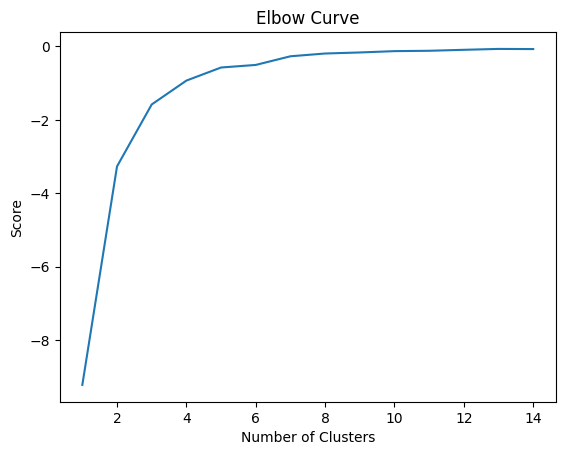

In [42]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


In [43]:
pca = PCA(n_components=1).fit(ynorm)
pca_d = pca.transform(ynorm)
pca = PCA(n_components=1).fit(xnorm)
pca_c = pca.transform(xnorm)


In [44]:
kmeans=KMeans(n_clusters=4)
kmeansoutput=kmeans.fit(ynorm)
kmeansoutput



KMeans(n_clusters=4)

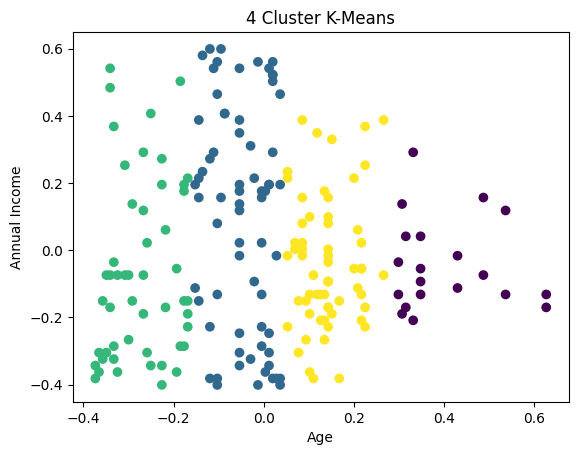

In [45]:
pl.figure('6 Cluster K-Means')
pl.scatter(pca_d[:, 0], pca_c[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Age')
pl.ylabel('Annual Income')
pl.title('4 Cluster K-Means')
pl.show()


In [47]:
labels=kmeansoutput.labels_
labels


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [48]:
X =df[['Age', 'Spending Score (1-100)']]
y =df[['Annual Income (k$)']]
xnorm = (X - X.mean())/(X.max()-X.min())
ynorm = (y - y.mean())/(y.max()-y.min())



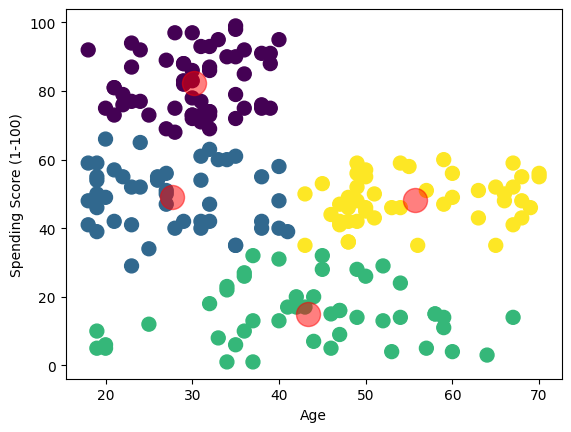

In [49]:
kmeans = KMeans(n_clusters = 4).fit(X)
labels = kmeans.labels_
centroids1 = kmeans.cluster_centers_
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

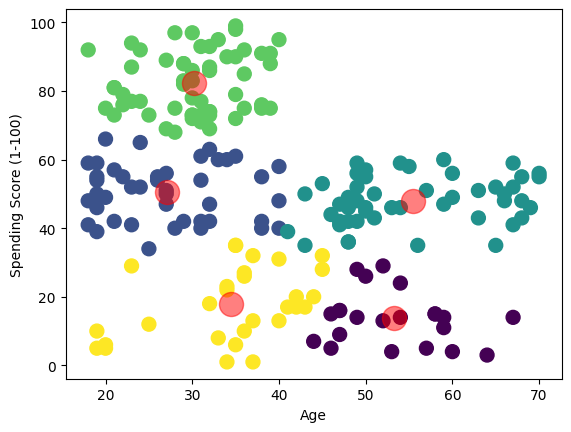

In [50]:
kmeans = KMeans(n_clusters = 5).fit(X)
labels = kmeans.labels_
centroids1 = kmeans.cluster_centers_
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()